# Introduction
## Types of Machine Learning
### Supervised ML
Each input has an explicit output, like a label or number.
Its goal is to find relations between in- and output.

The trained model can be used in an application.

#### Classification
Has labels as target (output), these are discrete values.
Used to predict e.g.  genre of a song.

#### Regression
Output is a numeric continuous value, like stock prices.

### Unsupervised ML
No output, the goal is to find relations between samples, e.g. clustering.

### Others
- Reinforcement learning, use a reward function with an agent, actions in an environment (states) in a feedback-update-loop to continuously update the model.
- Deep learning, deep neural networks, combines supervised, unsupervised and some other techniques

## Glossary
- Model: Relations in data that we model. In supervised learning: regression/classification model that is trained on our data.
- Model type/class: The underlying algorithm that is used to create the model, like SVM or KNN.
- Model parameters: Model parameters are what the models learn from data during training *on its own*
- Hyperparameters: They are the parameters for the algorithm and influence
    - how the model learns from the data
    - the model's complexity. Hyperparameters can be tuned to change the models' behaviour.
- Training: Fitting the model to the data.
- Evaluation/Test: Check how the model performs on test data.
- Features/Predictors/Dimensions: measurable property, usually the columns in a csv.
- Sample: one data point or one row in a csv-file

## Basic ML Workflow
![Basic ML Workflow](img/ml_workflow.png)

## Type III Error
*Provide the right answer to the wrong question.*

Often occurs when the dataset is not fully understood or some kind of pattern occurs in it, that does not occur naturally.
For example, model learns that every second sample is of type `A`.

Use common sense and intuition!

[Some examples](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vRPiprOaC3HsCf5Tuum8bRfzYUiKLRqJmbOoC-32JorNdfyTiRRsR7Ea5eWtvsWzuxo8bjOxCG84dAg/pubhtml?pli=1)

# Visualization
Visualization helps to understand data.
It shows patterns in datasets.

## What to look at first
1. Before you even visualize anything, the basics: Size of dataframe? Datatypes? Class distributions? Basic stats per features? Is there data missing? (NA, etc?)
2. Distribution of individual features: consider visualizing
3. Relations between features: consider visualizing

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ["sepal_length", "sepal_width", "petal_length", "petal_width", 'target'])
df["target"] = df["target"].apply(lambda x: iris.target_names[int(x)])
df.shape # the dimensions of the dataframe/dataset

(150, 5)

In [15]:
df.dtypes # the datatype of each dimension

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

In [16]:
df.describe() # shows for each numerical feature the mean, std, max, quantiles

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Classification: class distribution
Balanced data sets make things easier, but in reality often unequally distributed

## Regression: distribution of target variable
Similar problem: distribution not equal or does not cover complete target range

## Scatterplot
- pairplot, xyplot, etc
- shows relations between 2 feature
- Classification: color, symbol can indicate class label


<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

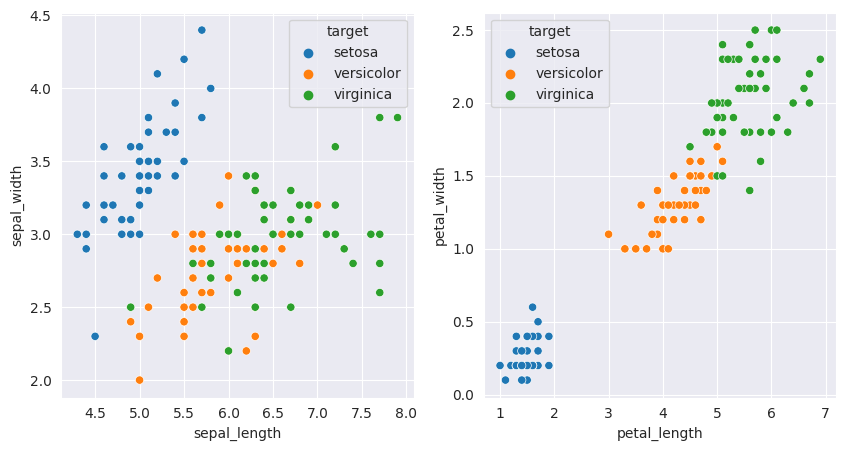

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn

_, ax = plt.subplots(1, 2, figsize=(10, 5))

sn.scatterplot(df[["sepal_length", "sepal_width", "target"]], x="sepal_length", y="sepal_width", hue="target", ax=ax[0])
sn.scatterplot(df[["petal_length", "petal_width", "target"]], x="petal_length", y="petal_width", hue="target", ax=ax[1])


## Scatterplot Matrix
Can show correlation between features, but can be messy with high dimensional datasets.

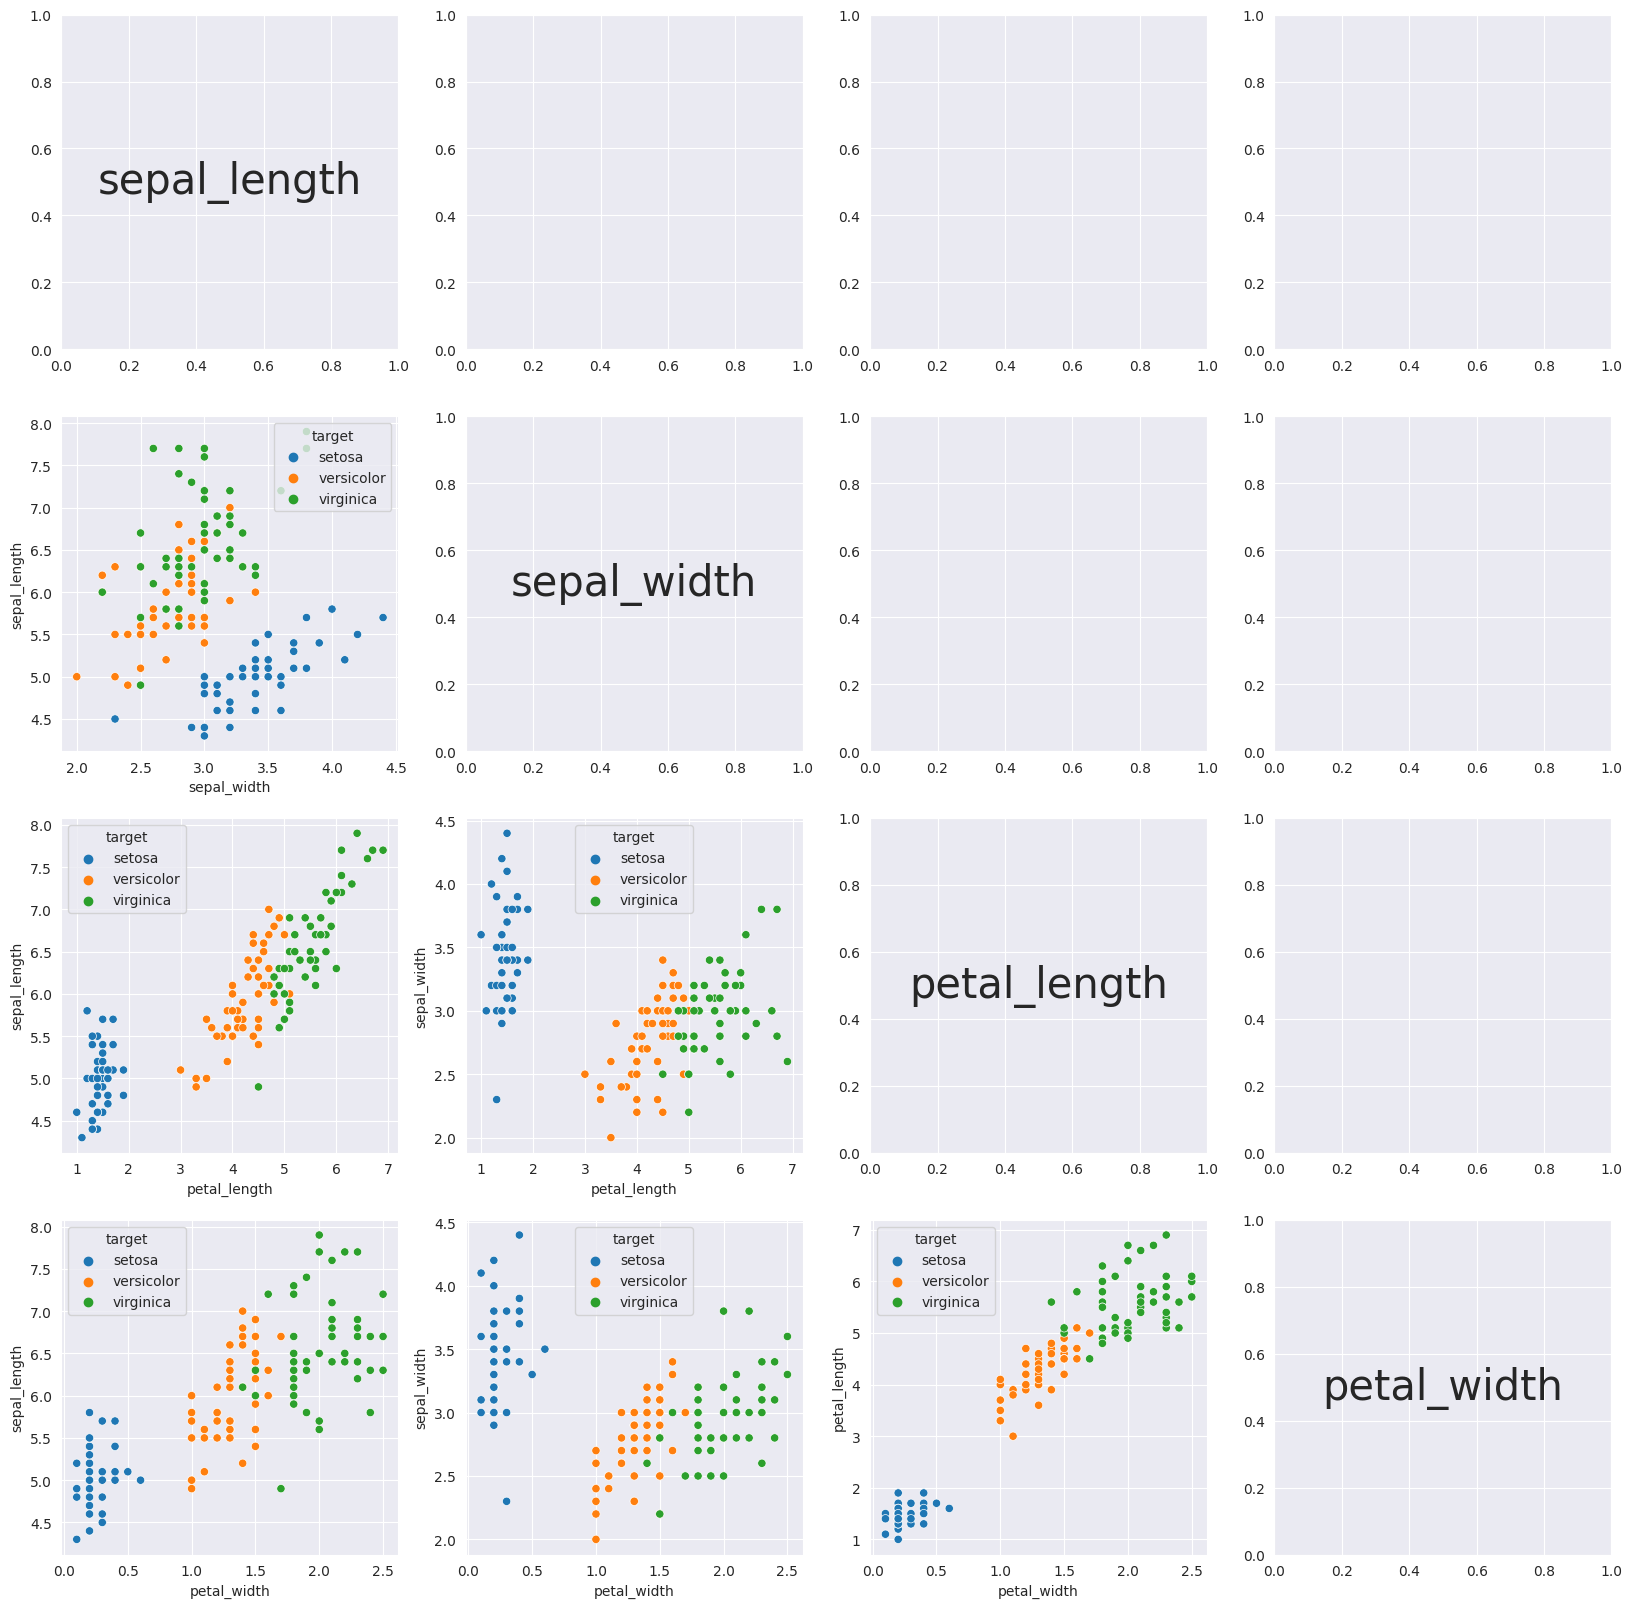

In [42]:
_, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, col in enumerate(df.drop("target", axis=1).columns):
    for j, inner_col in enumerate(df.drop("target", axis=1).columns):
        if col == inner_col:
            ax[i, j].text(0.5, 0.5, col, ha='center', va='center', size=30)
            break
        sn.scatterplot(df[[col, inner_col, "target"]], x=col, y=inner_col, hue="target", ax=ax[i, j])
plt.show()

## Densityplot
- Density of distribution of single variable
- Sometimes plots individual samples with scatter for better understanding of data
- Kernel parameter: defines granularity of density estimate
- Classification: the more feature densities of different classes overlap, the more similar is the feature
- Differences in density: feature poss. captures some differences in classes

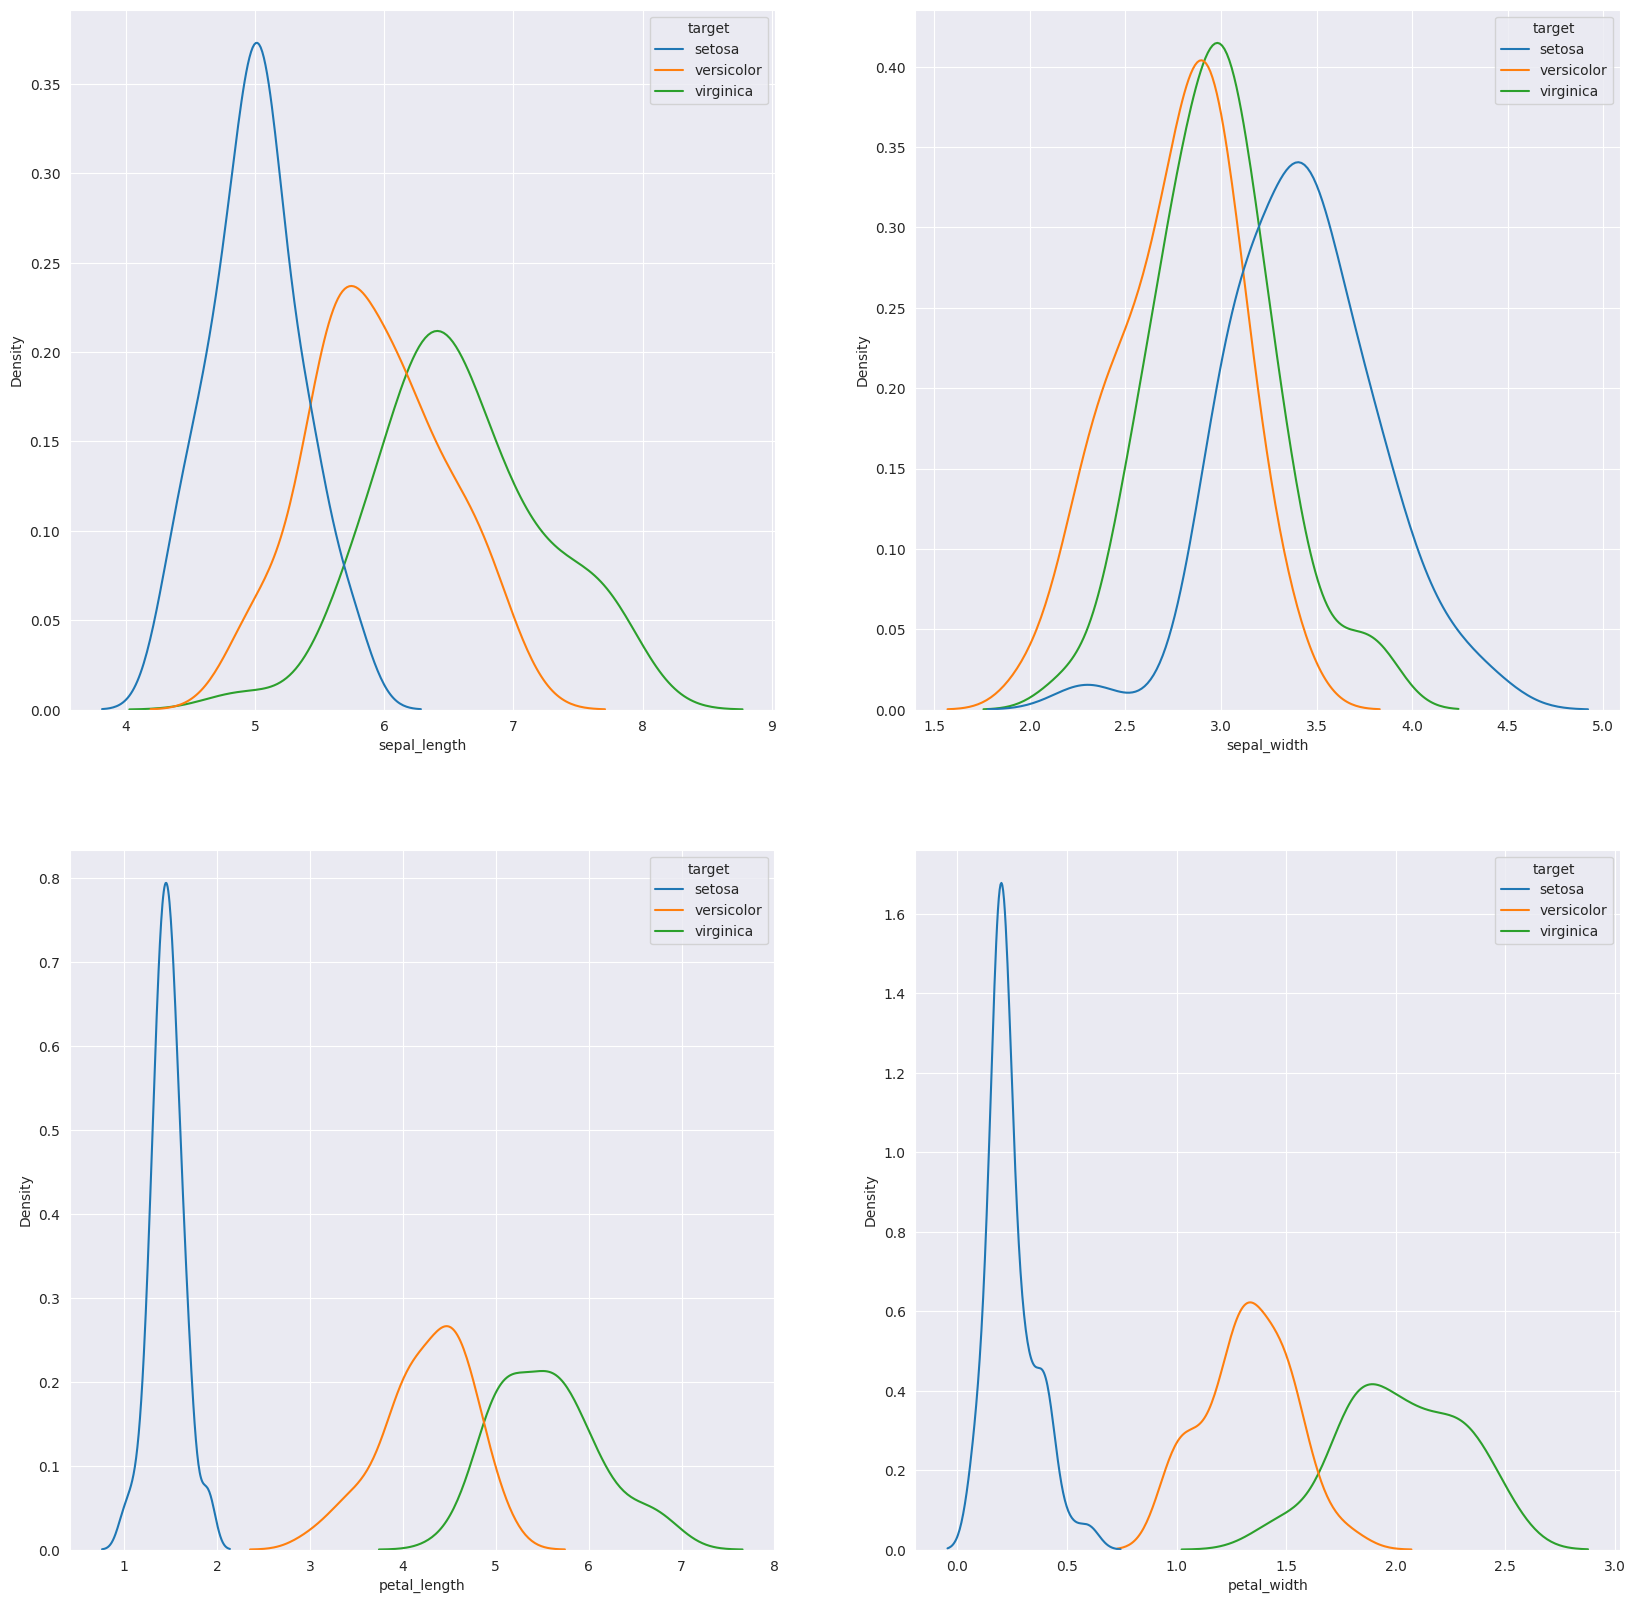

In [47]:
_, ax = plt.subplots(2, 2, figsize=(20, 20))

for i, col in enumerate(df.drop("target", axis=1)):
    sn.kdeplot(df, x=col, hue="target", ax=ax[i // 2, i % 2], kernel="")
plt.show()

## Histogram
Nr. of bins change how many bars are used in a histogram.
See also: Binning

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

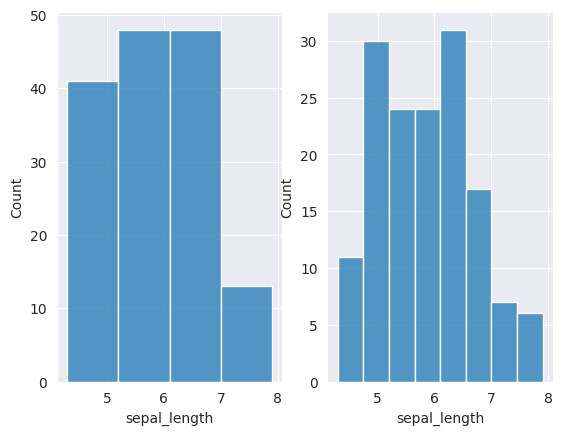

In [52]:
_, ax = plt.subplots(1, 2)
sn.histplot(df, x="sepal_length", bins=4, ax=ax[0])
sn.histplot(df, x="sepal_length", bins=8, ax=ax[1])